# Homework 16: Differential Equations

### Problem 1

Solve the following ODE $$\frac{dy}{dt} = ye^{-t}$$ to $t=6$.  Plot the resulting function $y(t)$. The initial condition is $y_0=1$. 

In [31]:
import numpy as np
from scipy.integrate import solve_ivp, odeint
%matplotlib inline
import matplotlib.pyplot as plt


def fun(t, y):
    
    dydt = y * np.exp(-t)
    
    return dydt

y0 = [1]
tspan = np.linspace(0,6,1000)

## Notes for future reference: solve_ivp is time before values
##                             whereas odeint is values before time
##                             np.linspace(start_time, end_time, #_of_points)
##                             solve_ivp has to take tspan as array, t_eval can be linspace
##                             odeint can plot using linspace whereas solve_ivp uses sol.t
##                             if there is only one DE do not put brackets around return part

sol = solve_ivp(fun, [0, 6], y0, t_eval = tspan)

In [32]:
sol

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 26
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.        , 0.00600601, 0.01201201, 0.01801802, 0.02402402,
       0.03003003, 0.03603604, 0.04204204, 0.04804805, 0.05405405,
       0.06006006, 0.06606607, 0.07207207, 0.07807808, 0.08408408,
       0.09009009, 0.0960961 , 0.1021021 , 0.10810811, 0.11411411,
       0.12012012, 0.12612613, 0.13213213, 0.13813814, 0.14414414,
       0.15015015, 0.15615616, 0.16216216, 0.16816817, 0.17417417,
       0.18018018, 0.18618619, 0.19219219, 0.1981982 , 0.2042042 ,
       0.21021021, 0.21621622, 0.22222222, 0.22822823, 0.23423423,
       0.24024024, 0.24624625, 0.25225225, 0.25825826, 0.26426426,
       0.27027027, 0.27627628, 0.28228228, 0.28828829, 0.29429429,
       0.3003003 , 0.30630631, 0.31231231, 0.31831832, 0.32432432,
       0.33033033, 0.33633634, 0.34234234, 0.34834835, 0.35435435,
       0.36036036,

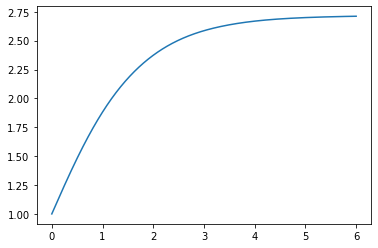

In [33]:
plt.plot(sol.t, sol.y[0])

In [34]:
def odeint_fun(y, t):
    
    dydt = y * np.exp(-t)
    
    return dydt

sol2 = odeint(odeint_fun, y0, tspan)

In [35]:
sol2

array([[1.        ],
       [1.00600593],
       [1.01201167],
       [1.01801699],
       [1.02402165],
       [1.0300255 ],
       [1.03602828],
       [1.04202977],
       [1.04802977],
       [1.05402807],
       [1.06002449],
       [1.0660188 ],
       [1.07201082],
       [1.07800033],
       [1.08398714],
       [1.08997105],
       [1.09595186],
       [1.10192939],
       [1.10790343],
       [1.11387379],
       [1.11984029],
       [1.12580274],
       [1.13176094],
       [1.13771472],
       [1.14366388],
       [1.14960825],
       [1.15554764],
       [1.16148188],
       [1.16741079],
       [1.17333419],
       [1.1792519 ],
       [1.18516376],
       [1.19106959],
       [1.19696922],
       [1.20286248],
       [1.20874921],
       [1.21462924],
       [1.2205024 ],
       [1.22636854],
       [1.2322275 ],
       [1.23807912],
       [1.24392323],
       [1.24975969],
       [1.25558833],
       [1.26140902],
       [1.26722159],
       [1.2730259 ],
       [1.278

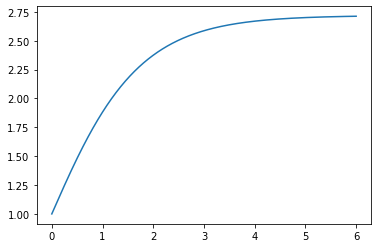

In [36]:
plt.plot(tspan, sol2)

### Problem 2

For the following first order reaction $A\rightarrow B$, solve for the concentration of A in time if the initial concentration $A_0=1.0$, and the reaction rate is given by $$\frac{dC_A}{dt} = -kC_A.$$ where k=2.0. 

#### Part a 
Make a plot of $C_{A}$ versus time. 
#### Part b

Calculate the product composition, $C_{B}(t)$ by solving the additional equation $$\frac{dC_B}{dt} = kC_A.$$ Include it on the plot of Part a.

In [7]:
# Part a

k = 2.0
C_0 = [1.0, 0]
tspan_a = np.linspace(0, 10, 1000)

def rxn(C, t):
    
    C_A = C[0]
    C_B = C[1]
    
    dCadt = -k * C_A
    dCbdt = k * C_A
    
    return [dCadt, dCbdt]

In [8]:
sol_a = odeint(rxn, C_0, tspan_a)

In [9]:
sol_a

array([[1.00000000e+00, 0.00000000e+00],
       [9.80179053e-01, 1.98209467e-02],
       [9.60750984e-01, 3.92490162e-02],
       ...,
       [2.25679061e-09, 9.99999998e-01],
       [2.21294451e-09, 9.99999998e-01],
       [2.16989724e-09, 9.99999998e-01]])

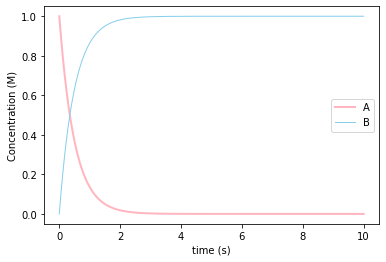

In [10]:
plt.plot(tspan_a, sol_a[:,0], 'lightpink', linewidth=2.0)
plt.plot(tspan_a, sol_a[:,1], 'skyblue', linewidth=1.0)
plt.xlabel('time (s)')
plt.ylabel('Concentration (M)')
plt.legend(['A', 'B'])

### Problem 3

We are performing a chemical reaction as follows.

$$
\begin{align*}
Rxn~1: A + B &\rightarrow C \\
Rxn~2: B + C &\rightarrow D
\end{align*}
$$

Here, symbols _A, B, C, D_ denote concentrations in _mol/L_. The initial concentrations are $A_0 = 1.0, B_0 = 1.0, C_0 = 0, D_0 = 0$. Also, $k_1 = 1 L/mol \cdot s$ and $k_2 = 1.5 L/mol \cdot s$.

Solve for the concentrations of _A, B, C, and D_ as functions of time. Solve at timestep intervals of _dt = 0.2s_ and solve to a final time of _t = 3s_. Also, solve for the selectivity defined as _S = C/(C+D)_ as a function of time. (S is usually undefined, but you can set it to 1 at t = 0). Use ODEINT (not Euler's equation) applied to every _d(Species)/dt_ above.

Plot the concentrations of A, B, C, D, and S as functions of time on the same plot. Label the axes as "time (s)" and "concentration (mol/L)". You can compare your solution to problem 2 of HW 5 where Euler's method is used to solve the problem. 


In [11]:
# dAdt = -k1*Ca*Cb
# dBdt = -k1*Ca*Cb - k2*Cb*Cc
# dCdt = k1*Ca*Cb - k2*Cb*Cc
# dDdt = k2*Cb*Cc

C0 = [1.0, 1.0, 0, 0]
k1 = 1
k2 = 1.5
tspan_3 = np.linspace(0, 3, 16)

def rxn_3(C, t):
    
    Ca = C[0]
    Cb = C[1]
    Cc = C[2]
    Cd = C[3]
    
    dAdt = -k1*Ca*Cb
    dBdt = -k1*Ca*Cb - k2*Cb*Cc
    dCdt = k1*Ca*Cb - k2*Cb*Cc
    dDdt = k2*Cb*Cc
    
    return [dAdt, dBdt, dCdt, dDdt]

In [12]:
sol_3 = odeint(rxn_3, C0, tspan_3)

In [13]:
sol_3

array([[1.        , 1.        , 0.        , 0.        ],
       [0.83455919, 0.81342682, 0.14430844, 0.02113237],
       [0.72068374, 0.6591135 , 0.21774603, 0.06157023],
       [0.63982214, 0.5357154 , 0.25607112, 0.10410674],
       [0.58069118, 0.43775541, 0.27637304, 0.14293577],
       [0.53633488, 0.35977102, 0.28710126, 0.17656386],
       [0.50234127, 0.2972859 , 0.29260335, 0.20505537],
       [0.47582175, 0.24684488, 0.29520138, 0.22897687],
       [0.454826  , 0.20582749, 0.2961755 , 0.2489985 ],
       [0.43799937, 0.17224818, 0.29624943, 0.26575119],
       [0.42437669, 0.14459313, 0.29583976, 0.27978356],
       [0.41325445, 0.12169761, 0.29518871, 0.29155684],
       [0.40410951, 0.10265636, 0.29443733, 0.30145315],
       [0.39654587, 0.08675861, 0.29366687, 0.30978726],
       [0.39025904, 0.0734409 , 0.29292282, 0.31681814],
       [0.38501166, 0.06225247, 0.29222915, 0.32275919]])

In [15]:
C_species = sol_3[:,2]
D_species = sol_3[:,3]

Selectivity = np.empty(len(C_species))

for i in range(len(C_species)):
    if (abs(C_species[i] + D_species[i]) > 1e-10):
        Selectivity[i] = C_species[i] / (C_species[i]+D_species[i])
    else:
        Selectivity[i] = 1
        
Selectivity    

array([1.        , 0.8722663 , 0.77956803, 0.71095741, 0.65911575,
       0.61919961, 0.58795986, 0.56316984, 0.54326784, 0.52713364,
       0.51394679, 0.50309493, 0.49411316, 0.48664324, 0.48040535,
       0.47517836])

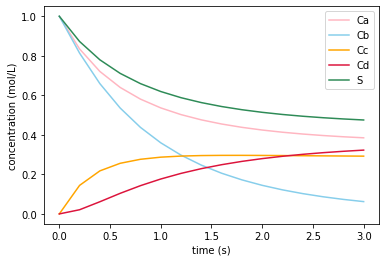

In [18]:
plt.plot(tspan_3, sol_3[:,0], 'lightpink')
plt.plot(tspan_3, sol_3[:,1], 'skyblue')
plt.plot(tspan_3, sol_3[:,2], 'orange')
plt.plot(tspan_3, sol_3[:,3], 'crimson')
plt.plot(tspan_3, Selectivity, 'seagreen')
plt.xlabel('time (s)')
plt.ylabel('concentration (mol/L)')
plt.legend(['Ca', "Cb", "Cc", "Cd", 'S'])